In [1]:
from utils import *

In [2]:
SNR = 100.0
#PARCELLATION = 'aparc.a2009s'
PARCELLATION = 'HCPMMP1_combined'
DATA_PATH = '/home/williamtheodor/Documents/DL for EEG Classification/data/'

data_dict = load_mmidb_data_dict(DATA_PATH, PARCELLATION, SNR, chop=False)

In [3]:
data_dict['Alpha']['S001']['S001R03'].keys()

dict_keys(['T0', 'T1', 'T2'])

In [4]:
label_dict = {
    'T0': {'03': 'Resting state', '04': 'Resting state', '05': 'Resting state', '06': 'Resting state', '07': 'Resting state', '08': 'Resting state', '09': 'Resting state', '10': 'Resting state', '11': 'Resting state', '12': 'Resting state', '13': 'Resting state', '14': 'Resting state'},
    'T1': {'03': 'Left fist, performed', '04': 'Left fist, imagined', '05': 'Both fists, performed', '06': 'Both fists, imagined', '07': 'Left fist, performed', '08': 'Left fist, imagined', '09': 'Both fists, performed', '10': 'Both fists, imagined', '11': 'Left fist, performed', '12': 'Left fist, imagined', '13': 'Both fists, performed', '14': 'Both fists, imagined'},
    'T2': {'03': 'Right fist, performed', '04': 'Right fist, imagined', '05': 'Both feet, performed', '06': 'Both feet, imagined', '07': 'Right fist, performed', '08': 'Right fist, imagined', '09': 'Both feet, performed', '10': 'Both feet, imagined', '11': 'Right fist, performed', '12': 'Right fist, imagined', '13': 'Both feet, performed', '14': 'Both feet, imagined'}
}

In [5]:
patients_to_exclude = ['S088', 'S089', 'S090', 'S092', 'S104', 'S106']
#runs_to_use = ['R04', 'R08', 'R12']
runs_to_use = ['R03', 'R07',  'R11']
baseline_runs = ['R01', 'R02']

T1_data = []
T2_data = []
baseline_data = []

open = []
closed = []

for patient in data_dict['Alpha'].keys():
    if patient not in patients_to_exclude:
        for run in data_dict['Alpha'][patient].keys():
            if run[-3:] in runs_to_use:
                T1_data.append([data_dict[band][patient][run]['T1'].mean(axis=0) for band in data_dict.keys()])
                T2_data.append([data_dict[band][patient][run]['T2'].mean(axis=0) for band in data_dict.keys()])

            if run[-3:] in baseline_runs:
                baseline_data.append([data_dict[band][patient][run]['T0'].mean(axis=0) for band in data_dict.keys()])

            if run[-3:] == 'R01':
                open.append([data_dict[band][patient][run]['T0'].mean(axis=0) for band in data_dict.keys()])
            if run[-3:] == 'R02':
                closed.append([data_dict[band][patient][run]['T0'].mean(axis=0) for band in data_dict.keys()])

T1_data = np.array(T1_data).mean(axis=0)
T2_data = np.array(T2_data).mean(axis=0)
baseline_data = np.array(baseline_data).mean(axis=0)

open = np.array(open).mean(axis=0)
closed = np.array(closed).mean(axis=0)

print(open.shape)

(5, 46)


In [6]:
activity_differences_T1 = np.zeros((5, 23))
activity_differences_T2 = np.zeros((5, 23)) 

baseline_differences = np.zeros((5, 23))



for i in range(5):
    for j in range(23):
        activity_differences_T1[i][j] = T1_data[i][j] - T1_data[i][j+23]
        activity_differences_T2[i][j] = T2_data[i][j] - T2_data[i][j+23]

        baseline_differences[i][j] = baseline_data[i][j] - baseline_data[i][j+23]



activity_differences_T1 = activity_differences_T1 / baseline_differences
activity_differences_T2 = activity_differences_T2 / baseline_differences

In [7]:
bands = list(data_dict.keys())

subjects_dir, subject, trans, src_path, bem_path = get_fsaverage()
labels = get_labels(subjects_dir, parcellation_name=PARCELLATION)
label_names = [label.name for label in np.array(labels).flatten()]

neutral_labels = np.unique([name[:-3] for name in label_names])

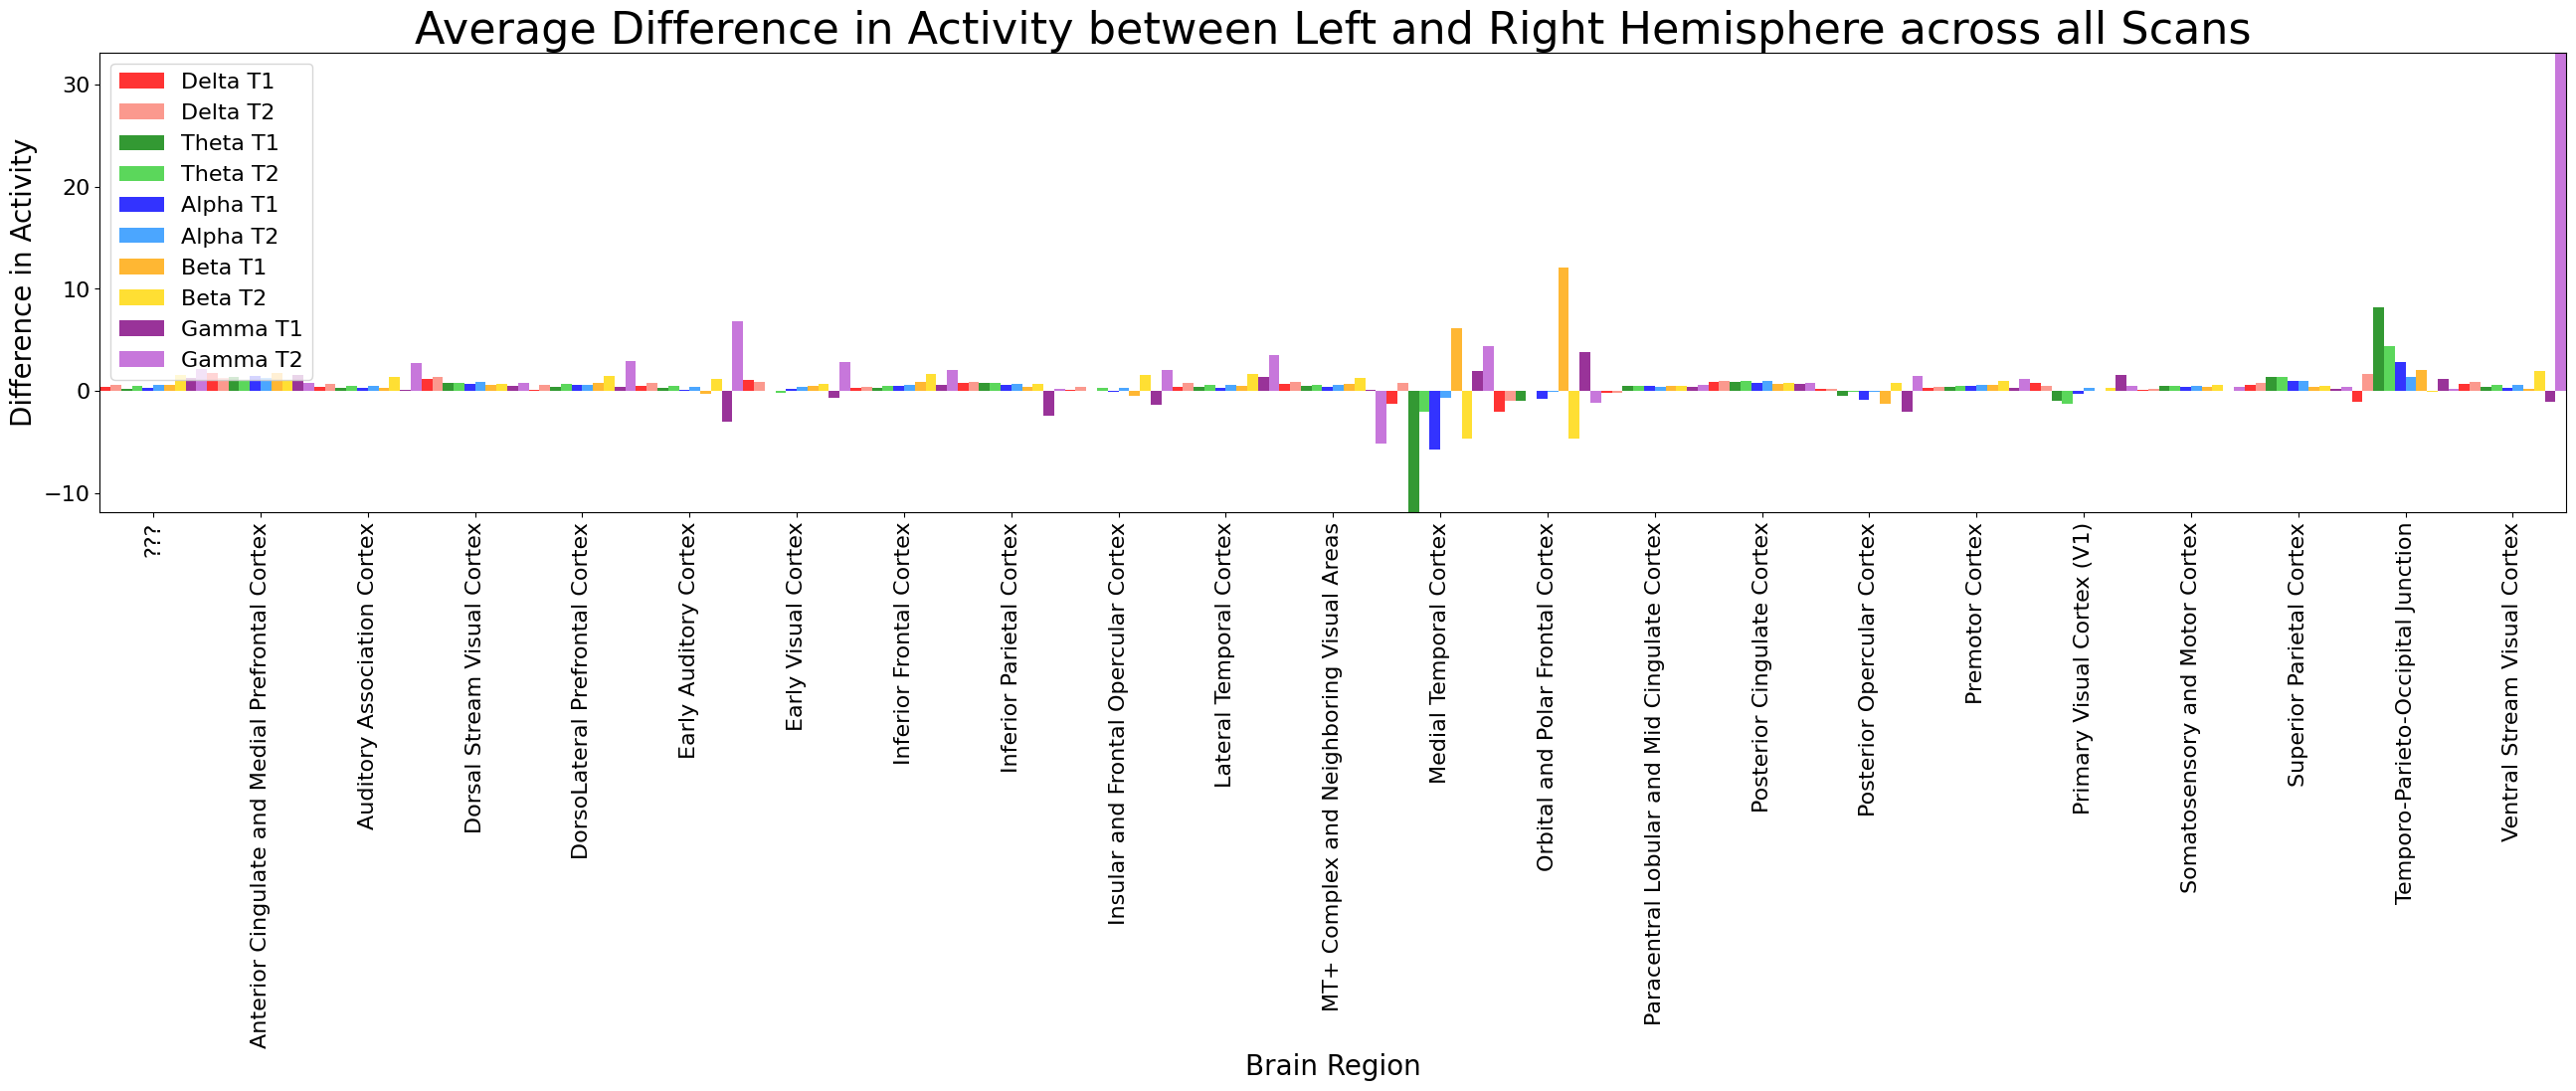

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each band and time point
colors_T1 = ['red', 'green', 'blue', 'orange', 'purple']
colors_T2 = ['salmon', 'limegreen', 'dodgerblue', 'gold', 'mediumorchid']

# Create a random numpy array of shape (5,23)

# Create a bar plot with 23 groups of 5 pairs of bars
fig, ax = plt.subplots(1, 1, figsize=(32, 6))
x = np.arange(23)
width = 0.1

x1 = x - width/2
x2 = x + width/2

adjust = [-4*width, -2*width, 0, 2*width, 4*width]

for i in range(5):
    ax.bar(x1 + adjust[i], activity_differences_T1[i], width, label=f'{bands[i]} T1', color=colors_T1[i], alpha=0.8)
    ax.bar(x2 + adjust[i], activity_differences_T2[i], width, label=f'{bands[i]} T2', color=colors_T2[i], alpha=0.8)

# Add axis labels and a title to the plot
ax.set_xlabel('Brain Region', fontsize=20)
ax.set_ylabel('Difference in Activity', fontsize=20)
ax.set_title(f'Average Difference in Activity between Left and Right Hemisphere across all Scans', fontsize=32)

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(neutral_labels, rotation=90, fontsize=16)

ax.tick_params(axis='y', labelsize=16)

ax.margins(0)

# Add a legend to the plot
ax.legend(fontsize=16, loc='upper left')

# Show the plot
plt.show()


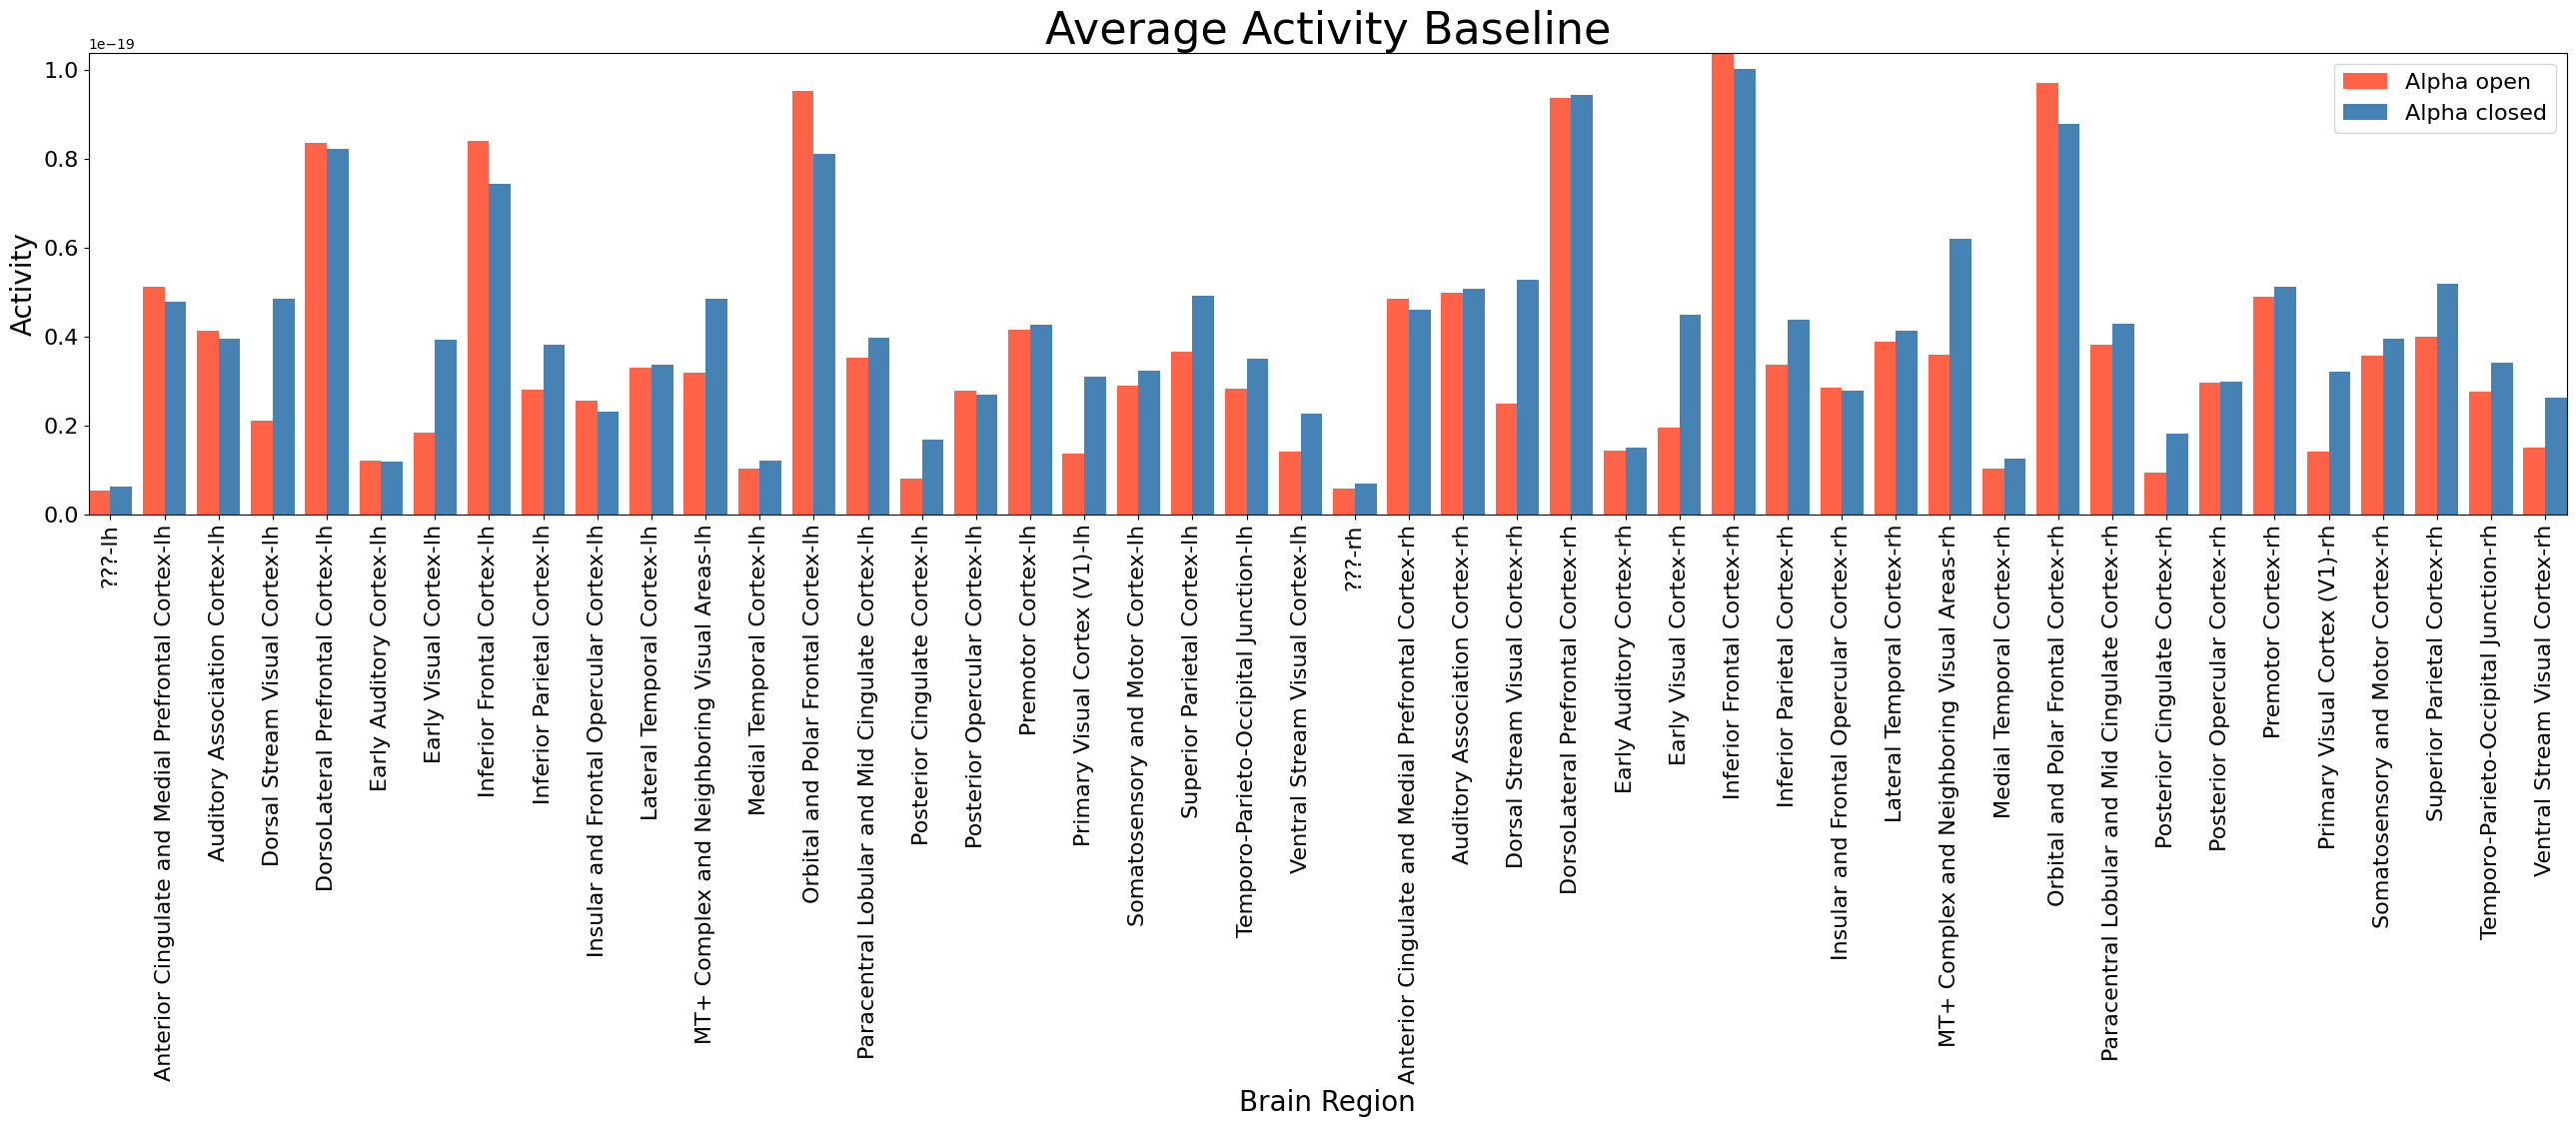

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Create a bar plot with 23 groups of 5 pairs of bars
fig, ax = plt.subplots(1, 1, figsize=(32, 6))
x = np.arange(46)
width = 0.4

x1 = x - width/2
x2 = x + width/2

adjust = [-4*width, -2*width, 0, 2*width, 4*width]


ax.bar(x1 + adjust[2], open[2], width, label=f'{bands[2]} open', color='tomato', alpha=1)
ax.bar(x2 + adjust[2], closed[2], width, label=f'{bands[2]} closed', color='steelblue', alpha=1)

# Add axis labels and a title to the plot
ax.set_xlabel('Brain Region', fontsize=20)
ax.set_ylabel('Activity', fontsize=20)
ax.set_title(f'Average Activity Baseline', fontsize=32)

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(label_names, rotation=90, fontsize=16)

ax.tick_params(axis='y', labelsize=16)

ax.margins(0)

# Add a legend to the plot
ax.legend(fontsize=16)

# Show the plot
plt.show()